# Практическая работа #3

# Визуализация многомерных данных. Создание пиктограмм при помощи Matplotlib.


Для выполнения данной практической работы предлагается проанализировать набор данных Data of rotary machine defects , который доступен для скачивания на Kaggle.
Этот набор данных представляет собой результаты эксперимента по выявлению дефектов в подшипниковых узлах жидкостного трения. Время эксперимента 10 мин. Частота получения данных о колебаниях ротора 1000 сиг/сек. Частота съема данных о температуре 1 сиг/сек. 
Первая цифра в названии файла указывает на номер эксперимента, а вторая на класс дефекта. Соответствие номера дефекта и его вида: 
‒	1 - нет дефектов, 
‒	2 - несоосность в муфте, 
‒	3 - наличие дисбаланса, 
‒	4 - втулка с дефектами.

Каждый столбец соответствует определенному параметру, в строках распо-ложены значения показаний с датчиков в каждый временной промежуток време-ни. Данные датчиков температуры продублированы для каждой секунды, для упрощения соотношения данных. 

## Init

In [ ]:
Зависит от используемой Вами среды.

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m pip install numpy scipy scikit-learn jupyter matplotlib pandas seaborn
%matplotlib inline

import zipfile
import os

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from IPython.display import Image
from matplotlib.patches import Ellipse, PathPatch, Arc, Polygon, Wedge

plt.rcParams['figure.dpi'] = 300

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.9 MB/s eta 0:00:00


In [ ]:
# https://www.kaggle.com/datasets/kazakovyurii/data-of-rotary-machine-defects
dataset_path = "dataset"
zip_path = "archive.zip"

# if not os.path.exists(dataset_path):
#     os.mkdir(dataset_path)
  
# with zipfile.ZipFile(zip_path, "r") as zip_ref:
#     zip_ref.extractall("dataset")

## Загрузка данных

### About data

| **Field** | **Units** | **Description** |
|---|---|---|
| **Fluctuations_X_in_the_left_bearing**         | [V] | Horizontal horizons in the left bearing, in Volts                                         |
| **Fluctuations_Y_in_the_left_bearing**         | [V] | Vertical oscillations in the left bearing, in Volts                                       |
| **Fluctuations_X_in_the_right_bearing**        | [V] | Horizontal vibrations in the right bearing, in Volts                                      |
| **Fluctuations_Y_in_the_right_bearing**        | [V] | Vertical vibrations in the right bearing bearing, in Volts                                |
| **Fluctuations_X_in_the_left_bearing_smooth**  | [V] | Horizontal vibrations in the left bearing, taking into account smoothing, in Volts        |
| **Fluctuations_Y_in_the_left_bearing_smooth**  | [V] | Vertical vibrations in the left bearing, taking into account smoothing, in Volts          |
| **Fluctuations_X_in_the_right_bearing_smooth** | [V] | Horizontal vibrations in the right bearing, taking into account smoothing, in Volts       |
| **Fluctuations_Y_in_the_right_bearing_smooth** | [V] | Vertical vibrations in the right bearing bearing, taking into account smoothing, in Volts |
| **Temperature_in_the_left_bearing**            | [V] | Temperature in the left bearing, in ohms                                                  |
| **Temperature_in_the_right_bearing**           | [O] | Temperature in the right bearing, in ohms                                                 |



### Извлечение данных

Зависит от среды разработки. Проверьте корректность путей для загрузки данных.



In [ ]:
data = [pd.read_csv(f"/content/data_2_{i}.csv") for i in range(1, 5)]
data = [d.rename(columns=lambda x: x.strip()) for d in data]

In [ ]:
tracked_columns =[
    "Fluctuations_X_in_the_left_bearing",
    "Fluctuations_Y_in_the_left_bearing",
    "Fluctuations_X_in_the_right_bearing",
    "Fluctuations_Y_in_the_right_bearing",
    "Fluctuations_X_in_the_left_bearing_smooth",
    "Fluctuations_Y_in_the_left_bearing_smooth",
    "Fluctuations_X_in_the_right_bearing_smooth",
    "Fluctuations_Y_in_the_right_bearing_smooth",
    "Temperature_in_the_left_bearing",
    "Temperature_in_the_right_bearing"
]

data = [d[tracked_columns] for d in data]

In [ ]:
data[0].head()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
0,5.671,6.404,6.040,7.257,5.442,6.486,5.593,7.145,1104.633,1104.664
1,5.599,6.298,5.758,7.203,5.641,6.361,5.838,7.206,1104.633,1104.664
2,5.589,6.236,5.654,7.165,5.571,6.249,5.700,7.192,1104.633,1104.664
3,5.489,6.414,5.632,7.319,5.471,6.294,5.645,7.219,1104.633,1104.664
4,5.623,6.455,5.791,7.310,5.592,6.440,5.716,7.349,1104.633,1104.664


In [ ]:
scaled_data = data
for i, df in enumerate(data):
    scaled_temp = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(df), 
    columns=df.columns    )
    scaled_data[i]=scaled_temp
scaled_data[0].head()
data = scaled_data

## Вычисление корреляции между признаками в данных

In [ ]:
def get_empty_columns_names(df):
    empty = [col for col in df.columns if (df[col].isnull().all() or df[col].isna().all())]
    return empty

In [ ]:
def heatmap(df, ax, title):
    corr = df.corr()

    # Omit pairs with weak correlation, try to experiments with this setting
    df_corr = corr[((corr >= .6) | (corr <= -.6))]

    #print("Empty columns:", get_empty_columns_names(df_corr))

    mask = np.triu(np.ones_like(corr))
    sns.heatmap(
        df_corr, 
        cbar=False, 
        mask=mask,
        ax=ax, 
        annot=True, 
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
    )

    ax.title.set_text(title)
    ax.tick_params(
        top=False,
        bottom=False,
        left=False,
        right=False,
    )

In [ ]:
fig, ax = plt.subplots(
    nrows=2, 
    ncols=2, 
    sharey=True, 
    sharex=True, 
    figsize=(20, 20), 
    constrained_layout=True
)

axes = ax.flatten()

for i, df in enumerate(data):
    heatmap(df, axes[i], f"Experiment {i + 1}")

plt.savefig("heatmaps.png", bbox_inches="tight")
plt.close()


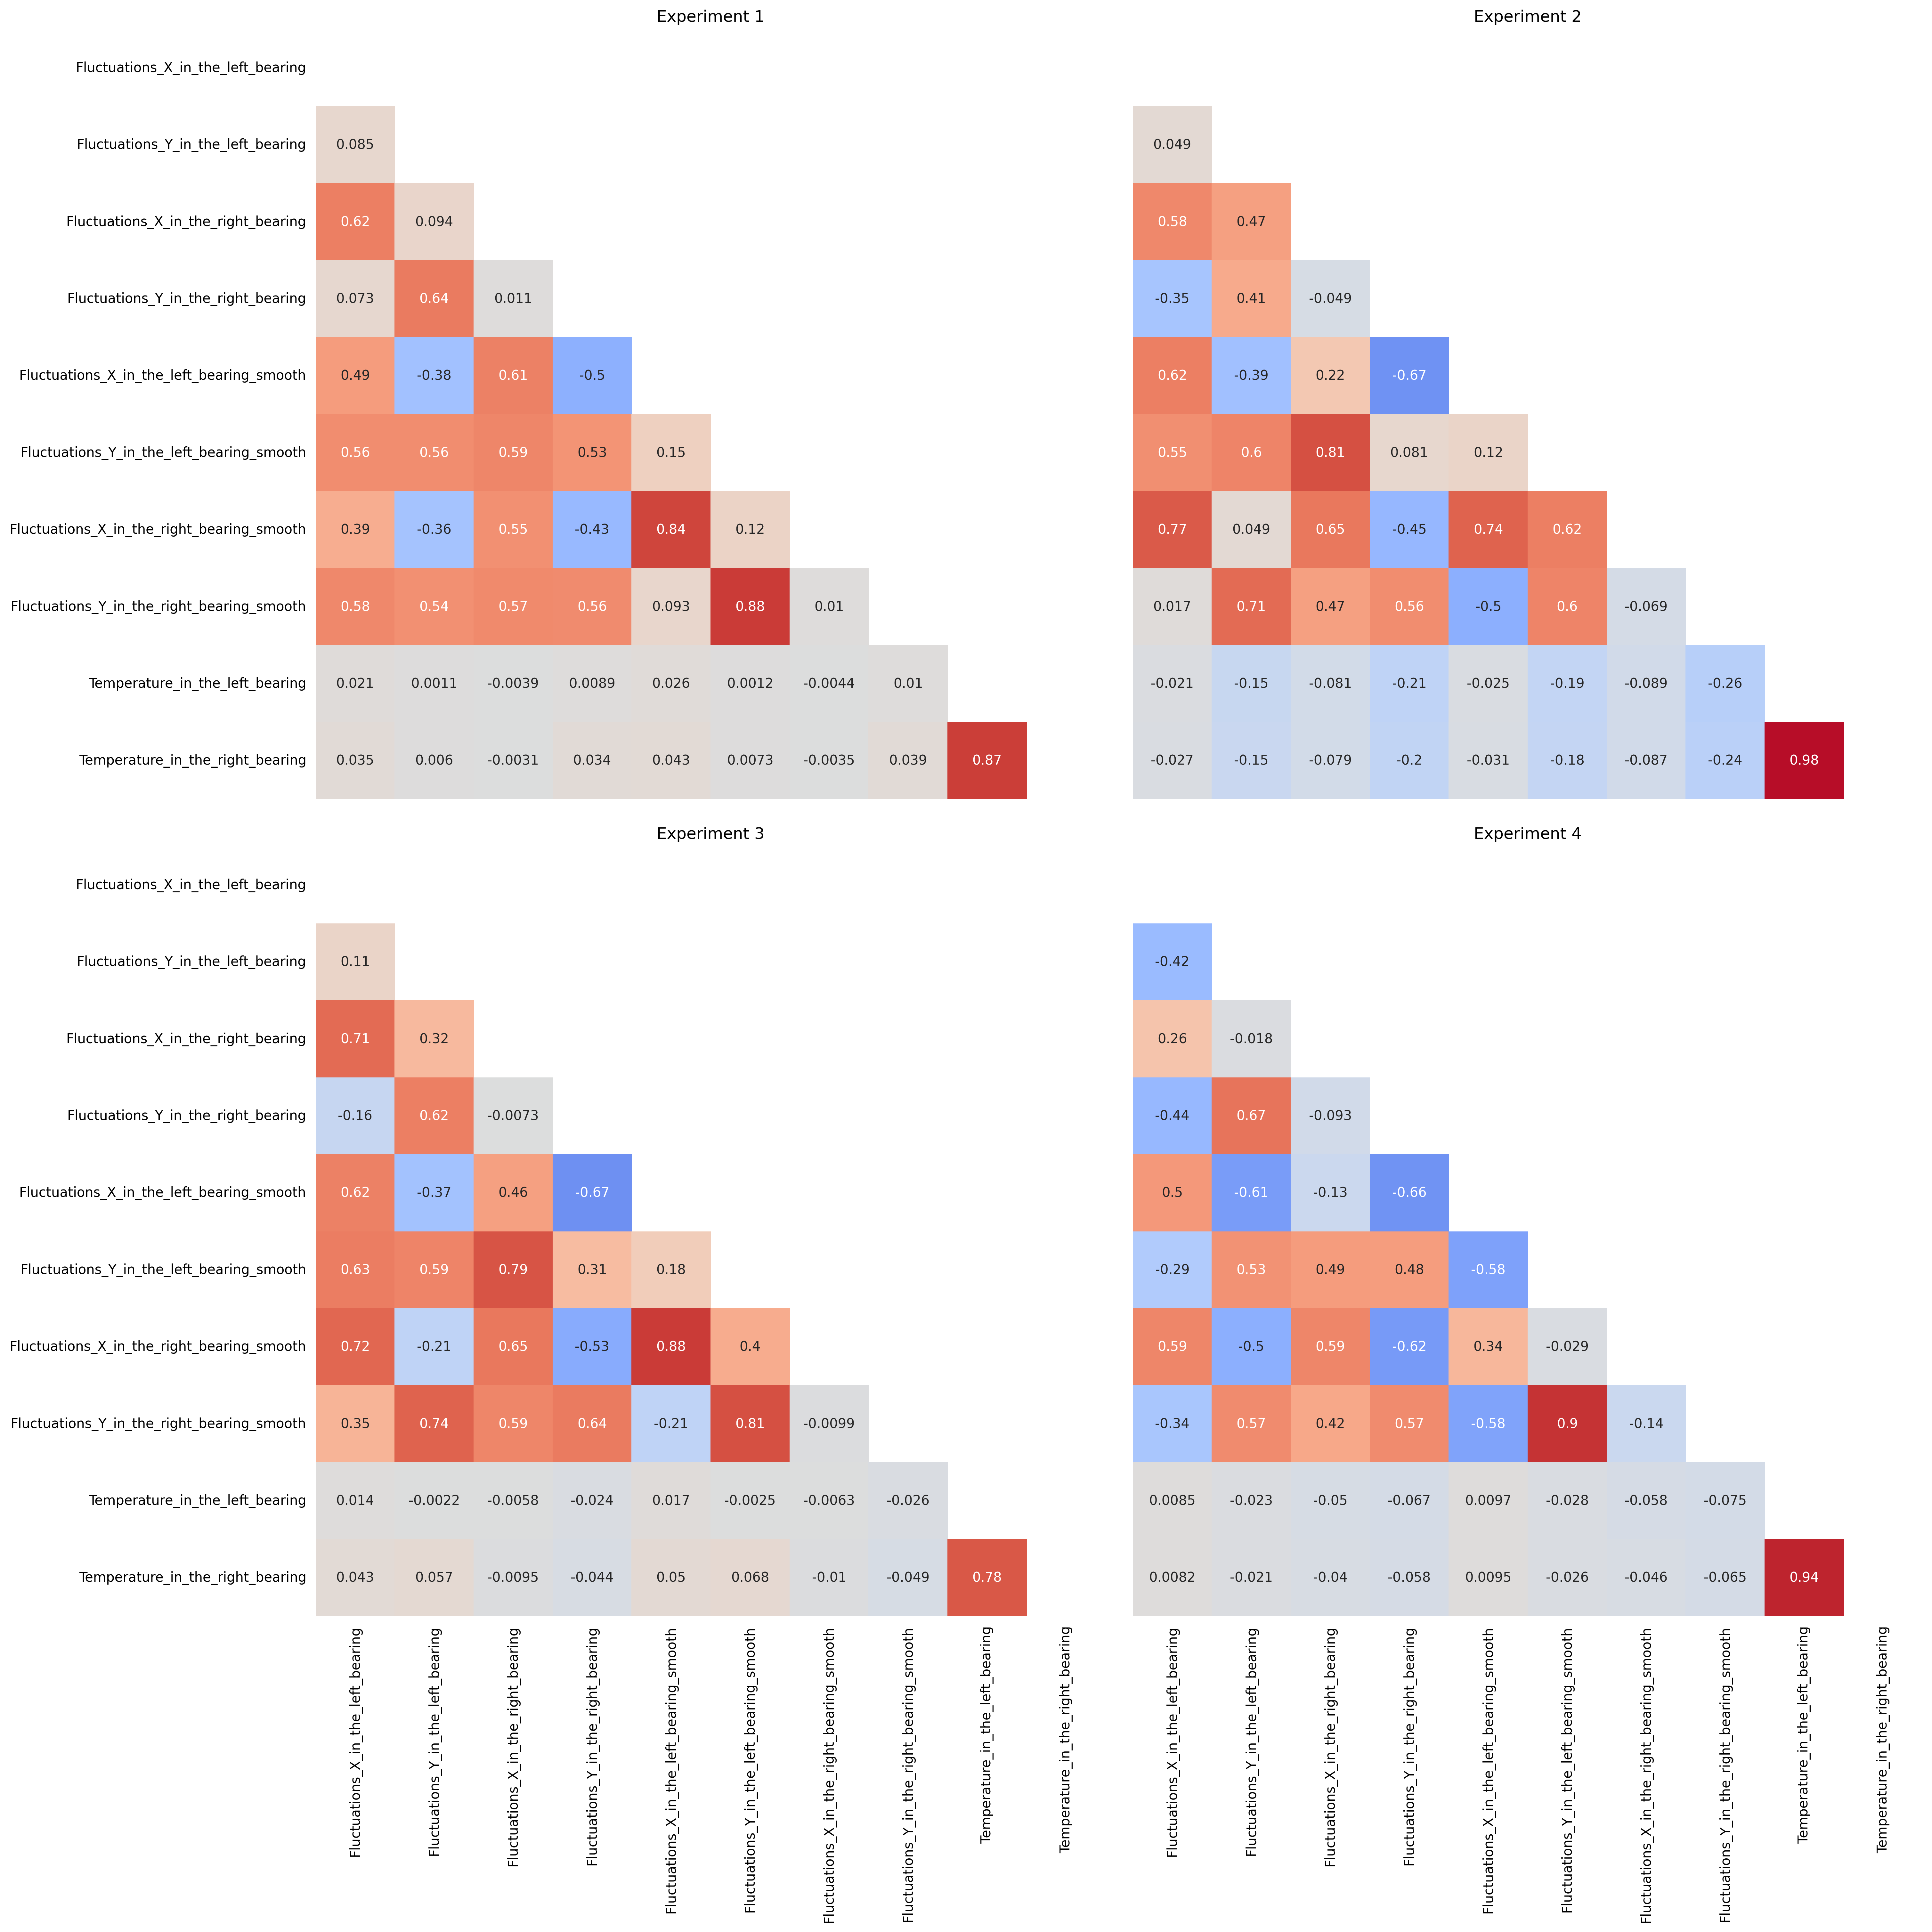

In [ ]:
img = Image("heatmaps.png")
img

Интересно увидеть, что в случае экспериментов с аномалиями появляется больше линейных связей между параметрами. Попробуйте поменять пороги для визуализации коэффициентов корреляции, вы сможете увидеть, что некоторые связи появляются, а некоторые исчезают, именно это может служить основанием для построения схемы кодирования. 

## Реализация лиц Чернова 

За основу взята реализация, предложенная [тут](https://datascience.oneoffcoder.com/chernoff-faces.html) и  доработанная магистром СПбГЭТУ "ЛЭТИ" В. Киселевой. Вы можете разработать собственный дизайн лица

### Схема кодирования

| **Field** | **Face feature** |
|---|---|
| **Fluctuation_X_in_the_right_bearing_smooth**            | Hair color |
| **Fluctuations_X_in_the_left_bearing**           | Skin color |
| **Fluctuations_Y_in_the_right_bearing_smooth**         | Hair length at the left side |
| **Fluctuations_Y_in_the_left_bearing_smooth**        | Hair length at the right side |
| **Fluctuations_Y_in_the_right_bearing**         | Curvature of the eyebrow at the left side |
| **Fluctuations_Y_in_the_left_bearing**        | Curvature of the eyebrow at the right side |
| **Fluctuations_X_in_the_right_bearing**  | Height of the eye at the left side |
| **Fluctuations_X_in_the_left_bearing_smooth** | Height of the eye at the right side |
| **Not used**  | Width of the nose |
| **Not used** | Width of the mouth |


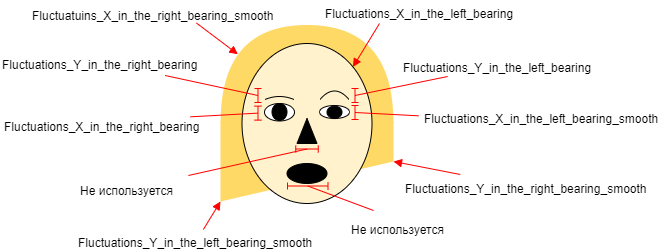

# Реализация


### Расчет средних показателей экспериментов (для их дальнейшей визуализации)


In [ ]:
mean_data = []

for i, df in enumerate(data):
    mean_data.append([*df.mean().tolist()])



### Reindex dataframe to fit properties order

In [ ]:
mean_df = pd.DataFrame(mean_data, columns=tracked_columns)
mean_df.to_csv('mean_df1.csv', index=False)

reindexed_columns = [ 
    "Fluctuations_X_in_the_right_bearing_smooth", #цвет волос
    "Fluctuations_X_in_the_left_bearing", # цвет лица
    "Fluctuations_Y_in_the_right_bearing_smooth",#+ длина волос слева  
    "Fluctuations_Y_in_the_left_bearing_smooth", #+ длина волос справа
    "Fluctuations_Y_in_the_right_bearing", #брови слева
    "Fluctuations_Y_in_the_left_bearing", # брови справа
   "Fluctuations_X_in_the_right_bearing", # глаза слева
   "Fluctuations_X_in_the_left_bearing_smooth", #глаза справа
  # "Fluctuations_Y_in_the_left_bearing_smooth",
 #   "Fluctuations_Y_in_the_right_bearing_smooth",
]
mean_df = mean_df.reindex(columns=reindexed_columns)



mean_df.to_csv('mean_df2.csv', index=False)

### Определение класса лиц Чернова 


In [ ]:
class ChernoffFaces:

    DATA = {
        "HAIR_COLOR": None,
        "SKIN_COLOR": None,    
        "HAIR_LEFT": None, 
        "HAIR_RIGHT": None, 
        "EYEBROW_CURVATURE_LEFT": None,
        "EYEBROW_CURVATURE_RIGHT": None,
        "EYE_HEIGHT_LEFT": None,
        "EYE_HEIGHT_RIGHT": None,
        "PUPIL_SIZE": 0.2,        
        "NOSE_WIDTH": None,
        "MOUTH_HEIGHT": 0.2,
        "MOUTH_WIDTH": None,
    }

    DYNAMIC_PARAMETERS = [
        "HAIR_COLOR",
        "SKIN_COLOR",  
        "HAIR_LEFT",
        "HAIR_RIGHT",
        "EYEBROW_CURVATURE_LEFT",
        "EYEBROW_CURVATURE_RIGHT",
       "EYE_HEIGHT_LEFT",
       "EYE_HEIGHT_RIGHT",
   #    "NOSE_WIDTH",
   #    "MOUTH_WIDTH",
    ]

    def __init__(self, df, labels=None, filename='faces'):

        if not labels:
            self.labels = df.iloc[:,0].values
            df = df[df.columns.drop(df.columns[0])]

        self.data = df

        for index, key in enumerate(self.DYNAMIC_PARAMETERS):
            self.DATA[key] = self.data[self.data.columns[index % len(self.data.columns)]].values.tolist()

        
        self.filename = filename

    def render_face(self, ax, title='', index=None):

        height, width = ax.bbox.height, ax.bbox.width

        self.draw_hair(ax, index, width, height)
        self.draw_face(ax, index, width, height)
        self.draw_l_brow(ax, index)
        self.draw_r_brow(ax, index)
        self.draw_l_eye(ax, index)
        self.draw_r_eye(ax, index)
    #    self.draw_nose(ax, index)   
     #   self.draw_mouth(ax, index)

        ax.title.set_text(title)
        ax.axis('off')
        ax.autoscale()

    def draw_hair(self, ax, index, width, height):

        hair_width = width
        hair_height = height

        colour = plt.cm.coolwarm(self.DATA["HAIR_COLOR"][index])  #настройка цветов

        trapeze = Polygon(
            xy=[
                [0, hair_height * 0.5 * (1 - self.DATA["HAIR_LEFT"][index])],
                [0, hair_height * 0.5],
                [hair_width, hair_height * 0.5],
                [hair_width, hair_height * 0.5 * (1 - self.DATA["HAIR_RIGHT"][index])],
            ], 
            fc=colour
        )
        ax.add_patch(trapeze)

        top = Wedge(
            center=[hair_width / 2, hair_height * 0.5 - 1], 
            r=hair_width / 2,
            theta1=0, 
            theta2=180,
            edgecolor='none', 
            fc=colour,
        )
        ax.add_patch(top)

    def draw_face(self, ax, index, width, height):

        face_width = width * 2/3
        face_height = height * 1/2
        self.UNIT_WIDTH = face_width / 7
        self.UNIT_HEIGHT = face_height / 7
        self.FACE_CENTER = [width / 2, height / 2]

        colour = plt.cm.RdBu(self.DATA["SKIN_COLOR"][index]) #настройка цветов

        ellipse = Ellipse(
        xy=self.FACE_CENTER, 
        width=face_width, 
        height=face_height, 
        edgecolor='black', 
        fc=colour, 
        lw=2
        )
        ax.add_patch(ellipse)

    def draw_l_brow(self, ax, index):

        brow_width = self.UNIT_WIDTH * 1.5
        brow_height =  self.UNIT_HEIGHT * self.DATA["EYEBROW_CURVATURE_LEFT"][index]
        if brow_height == 0:
            brow_height = 0.001

        brow_l_center = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [brow_width,  self.UNIT_HEIGHT * 1.1] 
        ])]

        brow_l = Arc(
            xy=brow_l_center, 
            width=brow_width, 
            height=brow_height, 
            theta1=0, 
            theta2=180,
            edgecolor='black', 
            fc='None', 
            lw=2
        )
        ax.add_patch(brow_l)

    def draw_r_brow(self, ax, index):

        brow_width = self.UNIT_WIDTH * 1.5
        brow_height =  self.UNIT_HEIGHT * self.DATA["EYEBROW_CURVATURE_RIGHT"][index]

        if brow_height == 0:
            brow_height = 0.001

        brow_r_center = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [-brow_width,  self.UNIT_HEIGHT * 1.1] 
        ])]

        brow_r = Arc(
            xy=brow_r_center, 
            width=brow_width, 
            height=brow_height, 
            theta1=0, 
            theta2=180,
            edgecolor='black', 
            fc='None', 
            lw=2
        )
        ax.add_patch(brow_r)

    def draw_l_eye(self, ax, index):

        eye_width = self.UNIT_WIDTH * 1.5
        eye_height =  self.UNIT_HEIGHT * self.DATA["EYE_HEIGHT_LEFT"][index] 

        if eye_height == 0:
            eye_height = 0.001

        eye_l_center = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [-eye_width,  self.UNIT_HEIGHT / 2] 
        ])]

        ellipse = Ellipse(
            xy=eye_l_center, 
            width=eye_width, 
            height=eye_height, 
            edgecolor='black', 
            fc='white', 
            lw=1
        )
        ax.add_patch(ellipse)

        ellipse = Ellipse(
            xy=eye_l_center, 
            width=eye_width / 2, 
            height=eye_height, 
            edgecolor='black', 
            fc='black', 
            lw=1
        )
        ax.add_patch(ellipse)

    def draw_r_eye(self, ax, index):

        eye_width = self.UNIT_WIDTH * 1.5
        eye_height =  self.UNIT_HEIGHT * self.DATA["EYE_HEIGHT_RIGHT"][index] 

        if eye_height == 0:
            eye_height = 0.001

        eye_r_center = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [eye_width,  self.UNIT_HEIGHT / 2] 
        ])]

        ellipse = Ellipse(
            xy=eye_r_center, 
            width=eye_width, 
            height=eye_height, 
            edgecolor='black', 
            fc='white', 
            lw=1
        )
        ax.add_patch(ellipse)   

        ellipse = Ellipse(
            xy=eye_r_center, 
            width=eye_width / 2, 
            height=eye_height, 
            edgecolor='black', 
            fc='black', 
            lw=1
        )
        ax.add_patch(ellipse)

    def draw_nose(self, ax, index):

        nose_width = self.UNIT_WIDTH * (1 - self.DATA["NOSE_WIDTH"][index])
        nose_height =  self.UNIT_HEIGHT  

        pivot_left = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [-nose_width / 2,  -nose_height] 
        ])]

        pivot_right = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [nose_width / 2,  -nose_height] 
        ])]

        pivot_top = self.FACE_CENTER

        points = np.array([pivot_left, pivot_right, pivot_top])
        nose = plt.Polygon(
            points, 
            closed=True, 
            lw=1,
            fc="black", 
            edgecolor='black',
        )
        ax.add_patch(nose)

    def draw_mouth(self, ax, index):

        mouth_width = self.UNIT_WIDTH * 3 * self.DATA["MOUTH_WIDTH"][index] 
        mouth_height = self.UNIT_HEIGHT * 1.5 * self.DATA["MOUTH_HEIGHT"]

        mouth_center = [sum(i) for i in zip(*[ 
            self.FACE_CENTER, 
            [0,  -self.UNIT_HEIGHT * 2] 
        ])]

        ellipse = Ellipse(
            xy=mouth_center, 
            width=mouth_width, 
            height=mouth_height, 
            edgecolor='black', 
            fc="black",  
            lw=1
        )
        ax.add_patch(ellipse)

    def render(self, n_cols=2, n_rows=1, figsize=(2, 2), empty_cols_ids=()):
        fig, ax = plt.subplots(
            nrows=n_rows, 
            ncols=n_cols, 
            figsize=figsize, 
            sharey=True,
            sharex=True,
            constrained_layout=True,
        )
        fig.patch.set_facecolor('white')
        axes = ax.flatten()
        for i, ax in enumerate(axes):
            if i in empty_cols_ids:
                ax.remove()
            if i == 0:
                self.render_face(ax, title=f"Reference", index=i)
                continue
            self.render_face(ax, title=f"Experiment {i}", index=i)

        plt.savefig(f"{self.filename}.png", bbox_inches="tight")
        plt.close()

### Построение визуализации для экспериментов


In [ ]:
reference = pd.DataFrame([(0.5 for _ in range(8))], columns=reindexed_columns)

mean_df = pd.DataFrame(
   preprocessing.MinMaxScaler().fit_transform(mean_df.values), 
    columns=mean_df.columns
)

mean_df = pd.concat([reference, mean_df])

In [ ]:
c = ChernoffFaces(mean_df)
c.render(
    n_cols = 5,
    n_rows = 1,
    figsize=(30, 7),
)

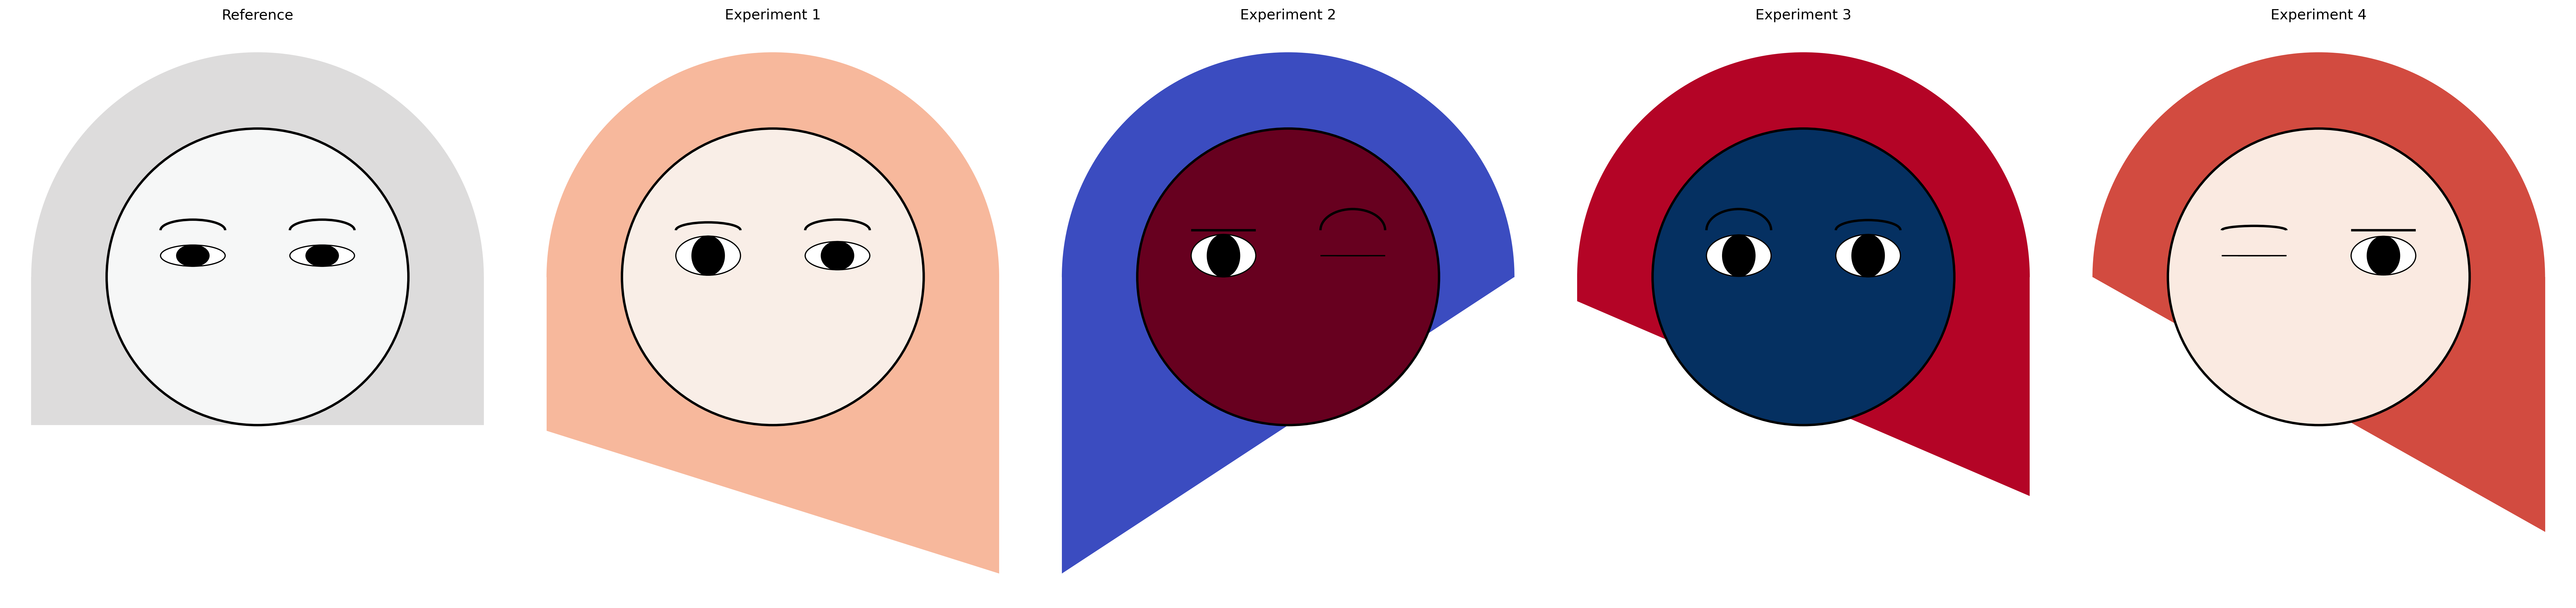

In [ ]:
img = Image("faces.png")
img